# XGBoost 모델 구축

In [99]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [100]:
#@title 01.데이터 불러오기

df = pd.read_csv('C:/Users/rx178/Desktop/ML_과제/data.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,Total_Stops,Price,Duration_total,Dep_hour,weekday_name_Monday,weekday_name_Saturday,weekday_name_Sunday,weekday_name_Thursday,weekday_name_Tuesday,weekday_name_Wednesday,Add_col_1,Add_col_2,Add_col_3,Air_col_1,Air_col_2,Air_col_3,Air_col_4,Air_col_5,Air_col_6
0,0,3897,170,22,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,2,7662,445,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2,13882,1140,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,6218,325,18,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,1,13302,285,16,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [101]:
#@title 02. 훈련/시험 세트 분리

x = df.drop(['Price'], axis = 1)
y = df['Price']
print(x.shape, y.shape)

(10682, 18) (10682,)


In [102]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
                                                    x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42
                                                    )

print(f'x_train.shape : {x_train.shape} / x_test.shape :{x_test.shape}')
print(f'y_train.shape : {y_train.shape} / y_test.shape :{y_test.shape}')

x_train.shape : (8545, 18) / x_test.shape :(2137, 18)
y_train.shape : (8545,) / y_test.shape :(2137,)


In [103]:
#@title 03.데이터 정규화

from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler(feature_range = (0,1))
x_train = mm_scaler.fit_transform(x_train)
x_test = mm_scaler.fit_transform(x_test)

In [104]:
#@title 04.모델링

# 모델링 (XGBoost - regressor 이용)
import xgboost as xgb
model_xgb = xgb.XGBRegressor(n_estimators = 500, max_depth = 5, random_state = 28)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

models = [model_xgb]

for model in models:
    # 훈련 데이터 학습
    model.fit(x_train, y_train)

    # 테스트 데이터 예측
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    # 모델 이름 출력
    print('모델명 : ', model)

    print('MAE : ', mean_absolute_error(y_test, test_pred))
    print('MSE : ', mean_squared_error(y_test, test_pred))
    print('RMSE : ', mean_squared_error(y_test, test_pred, squared = False))
    print('R2_score(결정계수) : ', r2_score(y_test, test_pred))

모델명 :  XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=28,
             reg_alpha=0, reg_lambda=1, ...)
MAE :  2075.002050061509
MSE :  10205678.757134855
RMSE :  3194.632804742175
R2_score(결정계수) :  0.5172114022671153


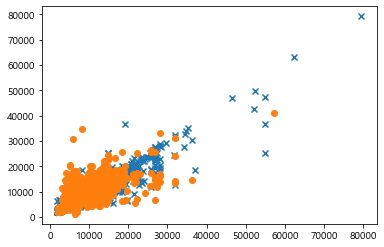

In [105]:
plt.scatter(y_train,train_pred,marker='x')
plt.scatter(y_test, test_pred,marker='o')
plt.show()

In [106]:
#@title 모델평가
comparison = pd.DataFrame({'실제 값' : y_test, '예측 값' : test_pred})
comparison

,실제 값,예측 값
6075,16655,18685.750000
3544,4959,13914.778320
9290,9187,8145.643066
5032,3858,4918.345215
2483,12898,5460.904785
...,...,...
9796,7408,8222.075195
9870,4622,4781.537598
10062,7452,7596.795898
8802,7060,9522.371094


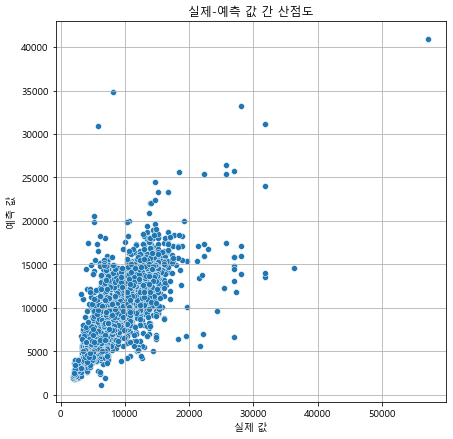

In [107]:
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize = (7,7))
sns.scatterplot(x = '실제 값', y = '예측 값', data = comparison)
plt.title('실제-예측 값 간 산점도')
plt.xlabel('실제 값')
plt.ylabel('예측 값')
plt.grid(True)
plt.show()

In [38]:
#@title 05.K-Fold 검증

from sklearn.model_selection import KFold
# 5번 폴딩, 셔플 ON, 난수 28
kf = KFold(n_splits = 7, shuffle = True, random_state = 28)

In [39]:
train_mae_total = list()
test_mae_total = list()

train_mse_total = list()
test_mse_total = list()

train_rmse_total = list()
test_rmse_total = list()

for i, j in kf.split(x):
    x_train, x_test = x.loc[i], x.loc[j]
    y_train, y_test = y[i], y[j]

    model_xgb = xgb.XGBRegressor(n_estimators = 500, max_depth = 5, random_state = 28)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    train_mae = mean_absolute_error(y_train, train_pred)
    train_mae_total.append(train_mae)
    test_mae = mean_absolute_error(y_test, test_pred)
    test_mae_total.append(test_mae)

    train_mse = mean_squared_error(y_train, train_pred)
    train_mse_total.append(train_mse)
    test_mse = mean_squared_error(y_test, test_pred)
    test_mse_total.append(test_mse)

    train_rmse = mean_squared_error(y_train, train_pred, squared = False)
    train_rmse_total.append(train_rmse)
    test_rmse = mean_squared_error(y_test, test_pred, squared = False)
    test_rmse_total.append(test_rmse)


In [40]:
print('train_mae : ', np.mean(train_mae_total))
print('test_mae : ', np.mean(test_mae_total))
print('mae_gap : ',abs(np.mean(test_mae_total)-np.mean(train_mae_total)))

print('-'*50)

print('train_mse : ', np.mean(train_mse_total))
print('test_mse : ', np.mean(test_mse_total))
print('mse_gap : ',abs(np.mean(test_mse_total)-np.mean(train_mse_total)))

print('-'*50)

print('train_rmse : ', np.mean(train_rmse_total))
print('test_rmse : ', np.mean(test_rmse_total))
print('rmse_gap : ',abs(np.mean(test_rmse_total)-np.mean(train_rmse_total)))

train_mae :  855.3038719132962
test_mae :  1417.8022609725692
mae_gap :  562.498389059273
--------------------------------------------------
train_mse :  2060660.9455081713
test_mse :  7080985.255165088
mse_gap :  5020324.309656916
--------------------------------------------------
train_rmse :  1435.2909505368557
test_rmse :  2654.5338785517283
rmse_gap :  1219.2429280148726


In [41]:
# k = 5
# train_mae :  837.5228041412317
# test_mae :  1417.0309181859225
# mae_gap :  579.5081140446907
# --------------------------------------------------
# train_mse :  1955582.0417502008
# test_mse :  6976561.489470768
# mse_gap :  5020979.447720567
# --------------------------------------------------
# train_rmse :  1397.9969928966284
# test_rmse :  2636.257310255637
# rmse_gap :  1238.2603173590087

In [42]:
# k = 7
# train_mae :  855.3038719132962
# test_mae :  1417.8022609725692
# mae_gap :  562.498389059273
# --------------------------------------------------
# train_mse :  2060660.9455081713
# test_mse :  7080985.255165088
# mse_gap :  5020324.309656916
# --------------------------------------------------
# train_rmse :  1435.2909505368557
# test_rmse :  2654.5338785517283
# rmse_gap :  1219.2429280148726


In [43]:
from sklearn.model_selection import GridSearchCV

max_depth = [3, 5, 10]
learning_rate = [0.01, 0.05, 0.1]

parameter = {
             'learning_rate': [0.01, 0.1, 0.3], # 경사하강법 : '매개변수' -> 최소오차 -> 보폭 크기
             'max_depth': [5, 7, 10], # 트리의 깊이 (오버피팅)
             'subsample': [0.5, 0.7, 1], # 추출할 데이터 비율
             'n_estimators': [300, 500, 1000] # 트리 개수
            }

In [65]:
# xgb_grid.fit(x_train, y_train)

# print('best_score',xgb_grid.best_score_)
# print('best_params',xgb_grid.best_params_)
# print('best_estimator',xgb_grid.best_estimator_)
# print('best_index',xgb_grid.best_index_)

# Fitting 5 folds for each of 81 candidates, totalling 405 fits
# best_score nan
# best_params {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.5}
# best_estimator XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
#                colsample_bylevel=1, colsample_bytree=1,
#                early_stopping_rounds=None, enable_categorical=False,
#                eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
#                importance_type=None, interaction_constraints='',
#                learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
#                max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
#                missing=nan, monotone_constraints='()', n_estimators=300,
#                n_jobs=0, num_parallel_tree=300, objective='reg:squarederror',
#                predictor='auto', random_state=0, reg_alpha=0,
#                sampling_method='uniform', ...)
# best_index 0

In [61]:
#@title 해당모델 피클파일로 내보내기
model_xgb = xgb.XGBRegressor(n_estimators = 500, max_depth = 5, random_state = 28)

import joblib
joblib.dump(model_xgb, 'xgboost_reg.pkl')

['xgboost_reg.pkl']

In [62]:
xgb_m = joblib.load('xgboost_reg.pkl')
xgb_m

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=28,
             reg_alpha=None, reg_lambda=None, ...)